# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Оглавление
___

[Подготовка](#4_preparing)<br>
[1.  Импорт данных и изучение общей информации](#4_1.)<br>
[2. Подготовка данных](#4_2.)<br>
[2.1. Замена названий колонок](#4_2.1)<br>
[2.2. Преобразование типов](#4_2.2)<br>
[2.3. Обработка пропусков](#4_2.3)<br>
[2.4. Проверка на дубликаты](#4_2.4)<br>
[2.5. Создание дополнительных признаков](#4_2.5)<br>
[3. Анализ данных](#4_3.)<br>
[3.1. Оценка количества выпускаемых игр](#4_3.1)<br>
[3.2. Анализ продаж по платформам](#4_3.2)<br>
[3.3. Формирование выборки за актуальный период](#4_3.3)<br>
[3.4. Определение потенциально прибыльных платформ](#4_3.4)<br>
[3.5. Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков](#4_3.5)<br>
[3.6. Соотнесение выводов о продажах игр на другие платформы](#4_3.6)<br>
[3.7. Анализ продаж игр по жанрам](#4_3.7)<br>
[4. Составление портрета пользователя каждого региона](#4_4.)<br>
[4.1. Самые популярные платформы (топ-5)](#4_4.1)<br>
[4.2. Самые популярные жанры (топ-5) ](#4_4.2)<br>
[4.3. Влияние рейтинга ESRB на продажи в отдельном регионе](#4_4.3)<br>
[5. Проверка гипотез](#4_5.)<br>
[5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#4_5.1)<br>
[5.2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные](#4_5.2)<br>
[6. Общий вывод](#4_6.)<br>

<a id='4_preparing'></a>
# Подготовка

## Описание игровых платформ

Для более глубокого погружения в данные расшифруем сокращения:

|Сокращение|Производитель|Название|Год выхода|Окончание поддержки|
|:-|:-|:-|:-|:-|
|psp|Sony| PlayStation  Portable|2004|2011|
|psv|Sony| PlayStation  Vita|2011|2019|
|ps|Sony| PlayStation  |1994|2006|
|ps2|Sony| PlayStation  2|2000|2012|
|ps3|Sony| PlayStation  3|2006|2015|
|ps4|Sony| PlayStation  4|2013||
|xb|Microsoft|Xbox|2001|2005|
|x360|Microsoft|Xbox 360|2005|2016|
|xone|Microsoft|Xbox One|2013||
|nes|Nintendo|Entertainment System|1983|1995|
|snes|Nintendo|Super Nintendo Entertainment System|1990|2003|
|n64|Nintendo|64|1996|2002|
|gc|Nintendo|GameCube|2001|2006|
|gb|Nintendo|Game Boy|1989|2001|
|gba|Nintendo|Game Boy Advance|2001|2008|
|ds|Nintendo|DS|2004|2008|
|wii|Nintendo|Wii|2006|2012|
|wiiu|Nintendo|Wii U|2012|2017|
|3ds|Nintendo|3DS|2011|2014|
|gen|Sega|Sega Mega Drive/Genesis|1988|1997|
|gg|Sega|Game Gear|1990|1997|
|scd|Sega|Mega-CD|1992|1996|
|sat|Sega|Sega Saturn|1994|1998|
|dc|Sega|Dreamcast|1998|2001|
|tg16|NEC|PC Engine (Turbo Grafx 16)|1987|1995|
|pcfx|NEC|PC-FX|1994|1998|
|2600|Atari|Atari 2600|1977|1982|
|3do|The 3DO Company|3DO Interactive Multiplayer|1993|1996|
|ws|Bandai|WonderSwan|1999|2003|
|ng|SNK|Neo-Geo|1990|1997|
|pc||Персональный компьютер|||

## Описание возрастных рейтингов

В данных приведены возрастные рейтнги организации ESRB. Создадим описание данных рейтингов, чтобы обработать и проанализировать их в дальнейшем:

|Рейтинг|Наименование|Описание|
|:-|:-|:-|
|AO|Adults Only 18+|*Только для взрослых*: Содержание игры только для взрослых старше 18 лет|
|E|Everyone|*Для всех*: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым|
|E10+|Everyone 10+|*Для всех от 10 лет и старше*: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови|
|EC|Early childhood|*Для детей младшего возраста*: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими|
|K-A|Kids to Adults|В 1996 заменен на *Everyone*|
|M|Mature 17+|*Для взрослых*: Материалы игры не подходят для подростков младше 17 лет.|
|RP|Rating Pending|*Рейтинг ожидается*, продукт был отправлен в ESRB и ожидает присвоения рейтинга|
|T|Teen|*Подросткам*: Игра подходит для лиц от 13 лет и старше|


## Импорт библиотек

### Основные библиотеки

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import re
import warnings
warnings.filterwarnings("ignore")

### Библиотеки для работы с графиками

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import plotly.io as pio

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### Настройки библиотек

In [3]:
# Меняем форматтер для отобраения вещественных чисел, чтобы приятно смотреть было на числа
pd.options.display.float_format = lambda x: f"{x:5,.6g}".replace(",", " ")

In [4]:
#Настраиваем графики
PLOTLY_TEMPLATE = pio.templates["ggplot2"]
PLOTLY_TEMPLATE["layout"].update(margin=dict(l=15,r=15,t=70,b=15,autoexpand=True), height=500, width=1000)
pio.templates.default = PLOTLY_TEMPLATE
pio.renderers.default = "png"
pio.kaleido.scope.default_scale = 1.5

mpl.style.use("ggplot")
mpl.rcParams["figure.figsize"] = 16,8
mpl.rcParams["figure.dpi"] = 96
mpl.rcParams["savefig.dpi"] = 300

sns.set(); sns.set(rc={'figure.figsize':(16,8)})

<a id="4_1."></a>
# 1.  Импорт данных и изучение общей информации

# Описание данных

* `Name` — название игры
* `Platform` — платформа
* `year_of_Release` — год выпуска
* `genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы долларов)
* `EU_sales` — продажи в Европе (миллионы долларов)
* `JP_sales` — продажи в Японии (миллионы долларов)
* `Other_sales` — продажи в других странах (миллионы долларов)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB.

Данные за 2016 год могут быть неполными.  
  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [5]:
games = pd.read_csv("./datasets/games.csv", sep=",", index_col=None)
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2 006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1 985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2 008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2 009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1 996,Role-Playing,11.27,8.89,10.22,1,nan,NaN,NaN


Импорт прошел успешно, взглянем на случайную выборку из данных:

In [6]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6462,The Adventures of Tintin: The Game,PS3,2 011,Action,0.06,0.15,0,0.05,59,5.7,E10+
16690,Pony Friends 2,PC,2 009,Simulation,0,0.01,0,0,nan,NaN,NaN
1479,Grand Theft Auto: Chinatown Wars,DS,2 009,Action,0.58,0.56,0.05,0.14,93,8.3,M
8062,Corpse Party: Blood Drive,PSV,2 014,Adventure,0.08,0.01,0.06,0.03,60,7.4,M
2882,LEGO Racers,N64,1 999,Racing,0.51,0.18,0,0.01,nan,NaN,NaN
14867,AMNESIA World,PSV,2 014,Adventure,0,0,0.03,0,nan,NaN,NaN
5207,Shaun Palmer's Pro Snowboarder,GBA,2 001,Sports,0.26,0.1,0,0.01,58,tbd,E
14581,Empire Earth II,PC,2 005,Strategy,0,0.03,0,0,79,7.1,T
10990,Jenga World Tour,DS,2 007,Misc,0.08,0,0,0.01,32,tbd,E
6721,Petz: Crazy Monkeyz,Wii,2 008,Simulation,0.22,0,0,0.02,nan,tbd,E


Посмотрим на общую информацию о данных:

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На первый взгляд можно сделать следующие выводы:
* в данных имеются пропуски;
* необходимо преобразование типов данных;
* требуется привести строковые данные к одному регистру;
* на некоторые признаки наложены ограничения, например, оценка пользователей (`User_Score`) должна лежать в дапазоне от 0 до 10, поэтому нужно проверить, все ли значения признака удовлетворяют наложенным ограничениям;  
  
Отсюда делаем вывод, что данные требуют предобработки.

<a id="4_2."></a>
# 2. Подготовка данных

<a id="4_2.1"></a>
## 2.1. Замена названий колонок

Приведем название колонок к нижнему регистру

In [8]:
games = games.set_axis(games.columns.str.lower(), axis=1, inplace=False)

In [9]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2 006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1 985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2 008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2 009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1 996,Role-Playing,11.27,8.89,10.22,1,nan,NaN,NaN


<a id="4_2.2"></a>
## 2.2. Преобразование типов

Взглянем на типы, которые имеют наши данные:

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выводы по данным следующие:
* `name`, `platform`, `genre`, `rating` необходимо преобразовать к единому регистру;
* `year_of_release` нужно преобразовать к временному типу данных;
* `user_scope` содержит значение *tbd*, необходимо разобраться с ним;
* `rating` содержит дубликаты: *E* и *K-A* одно и тоже;
* `user_scope` и `critic_score` должны лежать в диапазонах от 0 до 10, и от 0 до 100;
* данные имеют пропуски, необходимо их обработать.

Переведем все строковые данные к нижнему регистру, чтобы исключить дубликаты далее:

In [11]:
for column in ["name", "platform", "genre", "rating"]:
    games[column] =  games[column].str.lower()

Приведем год выхода игры (*year_of_release*) к типу отрезка времени, в данной работе это и не обязательно, но всё-такие лучше работать с временными типами:

In [12]:
games["year_of_release"] = pd.to_datetime(games["year_of_release"], format="%Y").dt.to_period(freq="Y")

In [13]:
display(games[["year_of_release"]])

,year_of_release
0,2006
1,1985
2,2008
3,2009
4,1996
...,...
16710,2016
16711,2006
16712,2016
16713,2003


Обработаем значение ***tdb*** в колонке `user_score`. Данная аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.  
Т.е. оценки пользователей еще нет, поэтому вместо данного значения поставим *NaN*. Т.к. никакой информации нет на данный момент.

In [14]:
games["user_score"] = games["user_score"].replace("tbd", np.nan).astype("float")

Обработаем дубликаты в колонке *rating*:

In [15]:
games["rating"] = games["rating"].replace('k-a', 'e')

Убрали повторы.

In [16]:
(games["rating"] == 'k-a').sum()

0

Проверим оценки критиков и пользователей:

In [17]:
games[["critic_score", "user_score"]].describe().round(2)

,critic_score,user_score
count,8 137,7 590
mean,68.97,7.13
std,13.94,1.5
min,13,0
25%,60,6.4
50%,71,7.5
75%,79,8.2
max,98,9.7


И те, и другие лежат в заданных диапазонах.

<a id="4_2.3"></a>
## 2.3. Обработка пропусков

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   name             16713 non-null  object       
 1   platform         16715 non-null  object       
 2   year_of_release  16446 non-null  period[A-DEC]
 3   genre            16713 non-null  object       
 4   na_sales         16715 non-null  float64      
 5   eu_sales         16715 non-null  float64      
 6   jp_sales         16715 non-null  float64      
 7   other_sales      16715 non-null  float64      
 8   critic_score     8137 non-null   float64      
 9   user_score       7590 non-null   float64      
 10  rating           9949 non-null   object       
dtypes: float64(6), object(4), period[A-DEC](1)
memory usage: 1.4+ MB


Пропуски в `name`:

In [19]:
games.query("name != name")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0,0.08,nan,nan,NaN
14244,NaN,gen,1993,NaN,0,0,0.03,0,nan,nan,NaN


Как видим, пропуски в *name* и в *genre* совпадают, да и в целом данные строки не несут информации, главные утеряны, просто удалим данные пропуски.

In [20]:
games = games.dropna(subset=["name"], inplace=False)

Данные пропуски могли возникнуть из-за *технических* проблем, например, несовпадение кодировок, при выгрузке\загрузке данных, в итоге важная информация утеряна. 

Есть возможность заполнить некоторые пропуски в колоне `year_of_release`, т.к. иногда игры содержат в названии год выпуска, поэтому возможно найти в названии год выпуска игры, где это возможно, и заполнить пропуски:

Всего пропусков в годах выпуска:

In [21]:
games["year_of_release"].isna().sum()

269

In [22]:
# Создаем регулярное выражение
pattern_year = re.compile(r"\b(\d{4})\b")

def find_year_in_name(name):
    try:
        # Ещем год, и преобразуем к типу отрезка времения, если что-то не так, будет брошено исключение
        year = pd.Period(pattern_year.findall(name)[-1], freq="Y")
        # Возвращаем год, если он укладывается в заданный диапазон
        return year if pd.Period(1970) <= year <= pd.Period(2017) else pd.Period(np.nan)
    except: 
        # Если было брошено исключение, то возвращаем NaT
        return pd.Period(np.nan)

In [23]:
year_in_name = games.loc[games["year_of_release"].isna(),"name"].apply(find_year_in_name)
games["year_of_release"] = games["year_of_release"].fillna(year_in_name)

Осталось пропусков:

In [24]:
games["year_of_release"].isna().sum()

252

Дальнейшее устранение пропусков не представляется возможным без обращения к дополнительным источникам информации.

Попытаемся заполнить некоторые пропуски в колонках `user_score` и `critic_score`. Логика заполнений будет следующая: предположим, что есть взаимосвязь между оценками пользователей и критиков, тогда возможно заполнить пропущенное значение в одной колонке на основании значения в другой.

Пропуски здесь могут означать следующее:
* данные утеряны при формировании базы, например, ошибки чтения\записи;
* отсутсвующее значение говорит нам о отсутствие у игры данных рейтингов, например, игра не оценивалась критиками, или наоборот, игра свежая, критики дали свою оценку, а обычные пользователи еще не успели в неё толком поиграть, чтобы сформировать рейтинг.  
Перейдем к заполнению пропусков.

Сделаем выборку данных без пропусков:

In [25]:
score = games[["critic_score", "user_score"]].dropna()

Оценим корреляцию между оценками пользователей и критиков:

In [26]:
display(score
    .corr()
    .round(3)
    .set_axis(labels=["Оценка критиков", "Оценка пользователей"],axis=1, inplace=False)
    .set_axis(labels=["Оценка критиков", "Оценка пользователей"], axis=0, inplace=False))

,Оценка критиков,Оценка пользователей
Оценка критиков,1,0.581
Оценка пользователей,0.581,1


Величина корреляции не сильно высокая, взглянем на диаграмму рассеяния:

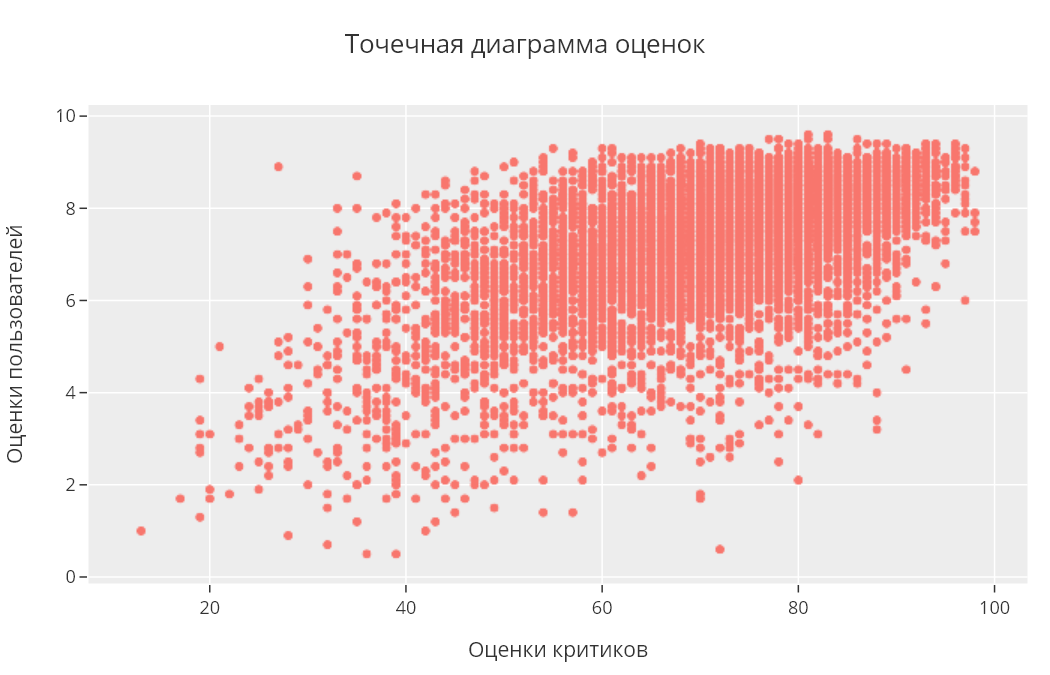

In [27]:
px.scatter(score, x="critic_score", y="user_score", title="Точечная диаграмма оценок",
           labels={"critic_score":"Оценки критиков","user_score":"Оценки пользователей"})

Вид диаграммы позволяет сделать вывод, что можно попробовать применить модель линейной регрессии для предсказания значений оценок:

In [28]:
#  Импорируем модель  
from sklearn.linear_model import LinearRegression

# Создаем модель линейного регрессора
model = LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)

In [29]:
# Обучаем модель на данных оценок критиков
model.fit(score["critic_score"].values.reshape(-1,1), score["user_score"])

# Предсказываем оценки пользователей по оценкам критиков
critic_score = games.loc[games["user_score"].isna(),"critic_score"].dropna()
user_score_predict = pd.Series(model.predict(critic_score.values.reshape(-1,1)), index=critic_score.index)

# Заполняем пропущенные значения
games["user_score"] = games["user_score"].fillna(user_score_predict)

In [30]:
# Обучаем модель на данных оценок пользователей
model.fit(score["user_score"].values.reshape(-1,1), score["critic_score"])

# Предсказываем оценки критиков по оценкам пользователей
user_score = games.loc[games["critic_score"].isna(),"user_score"].dropna()
critic_score_predict = pd.Series(model.predict(user_score.values.reshape(-1,1)), index=user_score.index)

# Заполняем пропущенные значения
games["critic_score"] = games["critic_score"].fillna(critic_score_predict)

[Text(0.5, 0, 'Оценка пользователей'),
 Text(0, 0.5, 'Оценка критиков'),
 Text(0.5, 1.0, 'Предсказания оценок критиков')]

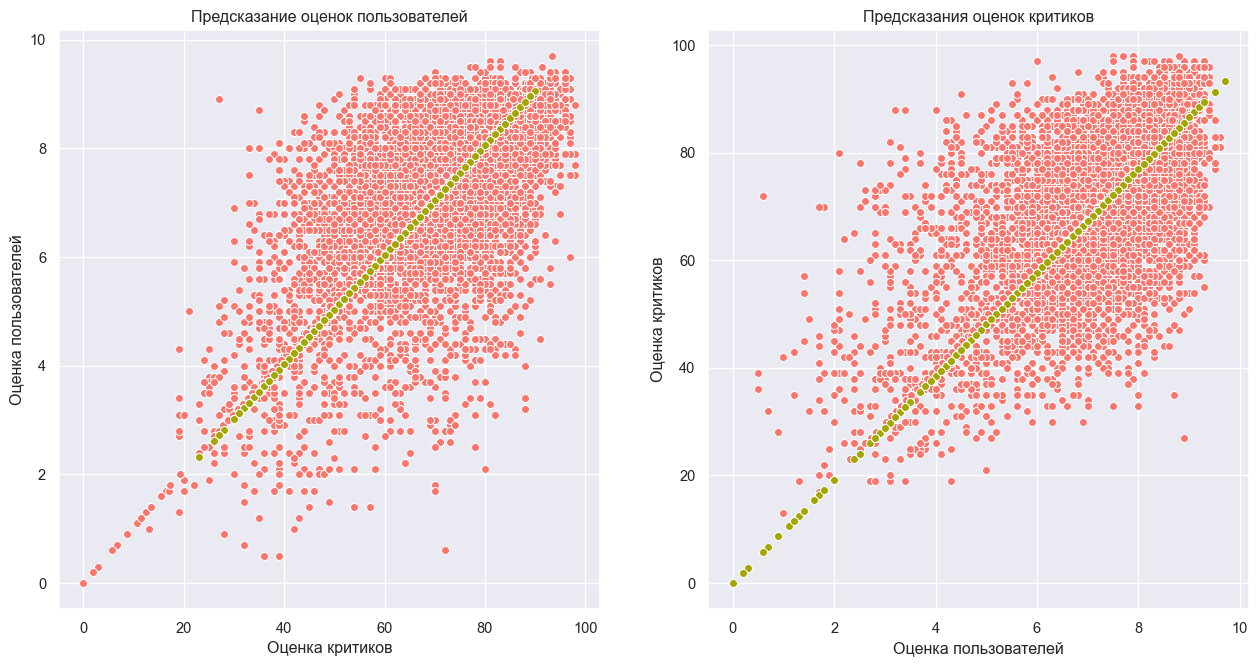

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
color = pio.templates.default.layout.colorway[0:2]

sns.scatterplot(data=games, x="critic_score", y="user_score", color=color[0], ax=ax1)
sns.scatterplot(x=critic_score, y=user_score_predict, color=color[1], ax=ax1)


ax1.set(xlabel="Оценка критиков", ylabel="Оценка пользователей", title="Предсказание оценок пользователей")

ax = sns.scatterplot(data=games, x="user_score", y="critic_score", color=color[0], ax=ax2)
sns.scatterplot(x=user_score, y=critic_score_predict, color=color[1], ax=ax2)

ax2.set(xlabel="Оценка пользователей", ylabel="Оценка критиков", title="Предсказания оценок критиков")

In [32]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   name             16713 non-null  object       
 1   platform         16713 non-null  object       
 2   year_of_release  16461 non-null  period[A-DEC]
 3   genre            16713 non-null  object       
 4   na_sales         16713 non-null  float64      
 5   eu_sales         16713 non-null  float64      
 6   jp_sales         16713 non-null  float64      
 7   other_sales      16713 non-null  float64      
 8   critic_score     8710 non-null   float64      
 9   user_score       8710 non-null   float64      
 10  rating           9949 non-null   object       
dtypes: float64(6), object(4), period[A-DEC](1)
memory usage: 1.5+ MB


Пропуски в колонке с рейтингом игры `rating`

In [33]:
games["rating"].value_counts(dropna=False)

NaN     6764
e       3993
t       2961
m       1563
e10+    1420
ec         8
rp         3
ao         1
Name: rating, dtype: int64

Тут ничего не поделать, оставляем всё как есть.

<a id="4_2.4"></a>
## 2.4. Проверка на дубликаты

Проверим, нет ли дубликатов в играх (учитываем название, платформу и год выпуска):

In [34]:
games[games[["name", "platform", "year_of_release"]].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0,0.23,83,5.5,e
16230,madden nfl 13,ps3,2012,sports,0,0.01,0,0,83,5.5,e


Нашли, что одна игра дублируется, удалим дубликат:

In [35]:
games = games.drop_duplicates(subset=["name", "platform", "year_of_release"])

Проверим, нет ли полных дубликатов:

In [36]:
games.duplicated().sum()

0

Полных дубликатов нет.

<a id="4_2.5"></a>
## 2.5. Создание дополнительных признаков

Добавим столбец, в котором будет информация о продажах игры во всех регионах:

In [37]:
games = games.assign(all_sales=games[["na_sales", "jp_sales","eu_sales", "other_sales"]].sum(axis=1))

In [38]:
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
4532,deer drive,ds,2010,sports,0.4,0,0,0.02,nan,nan,t,0.42
6640,men of valor,xb,2004,shooter,0.19,0.05,0,0.01,73,8,m,0.25
15957,strongest tokyo university shogi ds,ds,1985,action,0,0,0.02,0,nan,nan,NaN,0.02
15715,iridium runners,ps2,2008,racing,0.01,0.01,0,0,57,5.73796,e,0.02
12384,the amazing spider-man 2 (2014),3ds,2014,action,0.03,0.03,0,0.01,nan,nan,NaN,0.07
2224,teenage mutant ninja turtles,gba,2003,action,0.67,0.25,0,0.02,71,8.8,e,0.94
2422,guitar hero: warriors of rock,x360,2010,misc,0.47,0.31,0,0.08,72,6.5,t,0.86
10981,running wild,ps,1997,racing,0.05,0.03,0,0.01,nan,nan,NaN,0.09
8846,history civil war: secret missions,ps2,2008,shooter,0.07,0.06,0,0.02,nan,nan,NaN,0.15
10716,famicom mini: famicom tantei club part ii - us...,gba,2004,adventure,0,0,0.1,0,nan,nan,NaN,0.1


<a id="4_3."></a>
# 3. Анализ данных

<a id="4_3.1"></a>
## 3.1. Оценка количества выпускаемых игр

Построим график, демонстрирующий распределение количества выпускаемых игры за год:

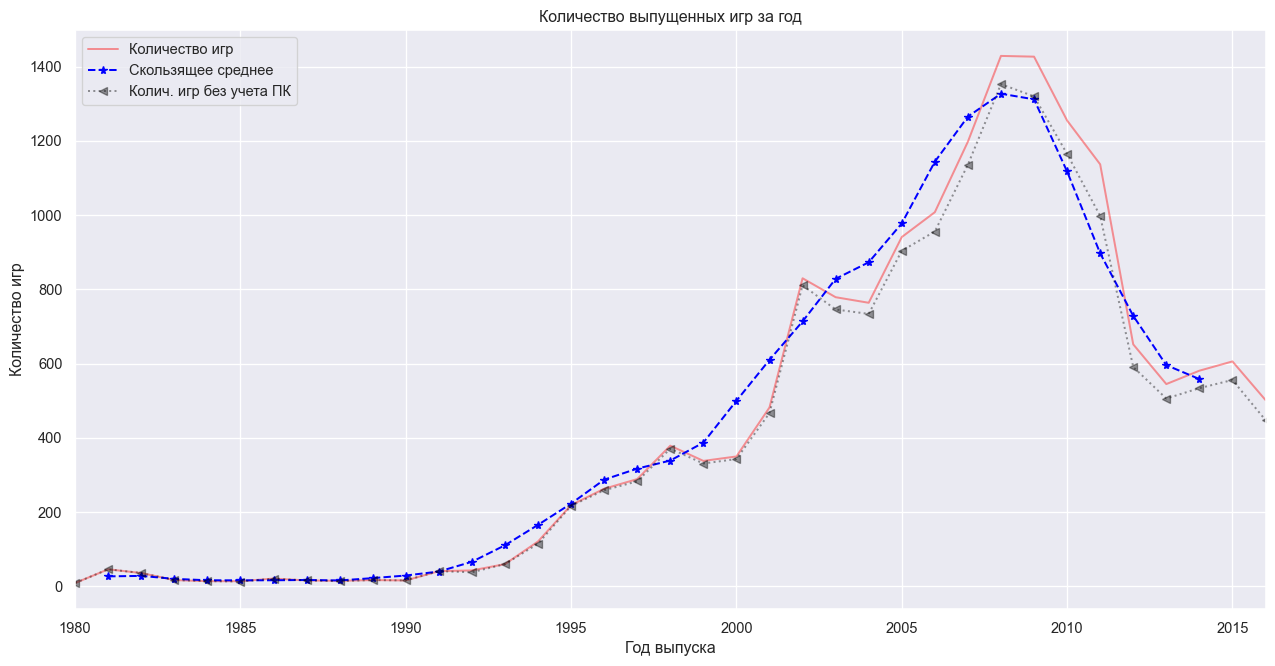

In [39]:
num_games_per_year = games.pivot_table(values="name", index=["year_of_release"], aggfunc="count")

ax = plt.gca()
num_games_per_year.plot(color="red",  ax=ax,alpha=0.4)
num_games_per_year.rolling(4).mean().shift(periods=-2).plot(color="blue",
                                                          ax=ax, style="*--")

num_games_per_year_without_pc = games.query("platform != 'pc'").pivot_table(values="name", index=["year_of_release"], aggfunc="count")
num_games_per_year_without_pc.plot(color="black",  ax=ax,alpha=0.4, style="<:")

ax.set(xlabel="Год выпуска", ylabel="Количество игр", title="Количество выпущенных игр за год")
ax.legend(["Количество игр", "Скользящее среднее", "Колич. игр без учета ПК"]);

Как видно из графика, середина *90-х* ознаменовала начало роста количества выпускаемых игр.  
Изначально, я подумал, что это обусловлено популяризацией ПК, однако, если исключить данную платформу из данных, и построить еще раз график, то видно, что вклад  *ПК* в общее количество небольшой.

<a id="4_3.2"></a>
## 3.2. Анализ продаж по платформам

Для начала определим некоторые понятие:
* *время жизни платформы* - это количество лет, в течение которых продажи с платформы выше, чем *10%* от максимума продаж за все годы для данной платформы;
* *актуальное время платформы* - это количество лет, в течении которых платформа находися в топе по продажам.

Итак, начнем анализ, для начала определим *время жизни* платформ.

Группируем данные по платформам:

In [40]:
platforms = games.pivot_table(values="all_sales", index=["platform", "year_of_release"], aggfunc="sum", fill_value=0, dropna=False)
platforms.sample(10)

,,all_sales
platform,year_of_release,
wiiu,1985,0
ws,2007,0
tg16,1989,0
ps2,2009,26.4
gba,2010,0
2600,1996,0
gba,2011,0
pc,1998,3.26
3ds,2013,56.57


Функция нормализации данных продаж, нормализация позволяет далее удобно найти проговое значение для каждой платформы (те самые *10%*)

In [41]:
def normalize_0_1(data):
    return (data-np.nanmin(data))/np.ptp(data.values, axis=0)

Функция определение года начала жизник платформы, и года "смерти" платформы:

In [42]:
def life_time_platform(group):
    # Подготовка данных
    data = group.droplevel(0).reset_index().sort_values(by="year_of_release")
    
    # Нормализация
    data["all_sales"] = normalize_0_1(data["all_sales"])
    
    # Определяем первый и последний годы, когда продажи платформы были выше 10% от максимума
    life_time =  (data.query("all_sales >= 0.1").iloc[[0,-1], 0]).set_axis(labels=["year_start", "year_end"], axis=0, inplace=False)

    return life_time

Применяем функцию для каждой платформы, и также дополнительно вычисляем сколько лет "прожила" платформа:

In [43]:
platform_year = platforms.groupby(level=0).apply(life_time_platform)
platform_year = platform_year.assign(year_of_life=platform_year["year_end"].dt.year - platform_year["year_start"].dt.year + 1)
platform_year

year_of_release,year_start,year_end,year_of_life
platform,,,
2600,1980,1983,4
3do,1994,1995,2
3ds,2011,2016,6
dc,1998,2001,4
ds,2004,2011,8
gb,1989,2001,13
gba,2001,2005,5
gc,2001,2006,6
gen,1990,1994,5


Найдем типовое время жизни платформ:

In [44]:
display(platform_year
    .agg(["mean", "median"])
    .round(2)
    .set_axis(labels=["Время жизни платформ, лет"], axis=1, inplace=False)
    .set_axis(labels=["Среднее значение", "Медиана"], axis=0, inplace=False))

,"Время жизни платформ, лет"
Среднее значение,6.16
Медиана,5


Получили, что игровая платформа "живет", т.е. игры для данной платформы приносят достаточно большое количество продаж, примерно ***5-6 лет***.  
Построим дополнительно диаграмму размаха:

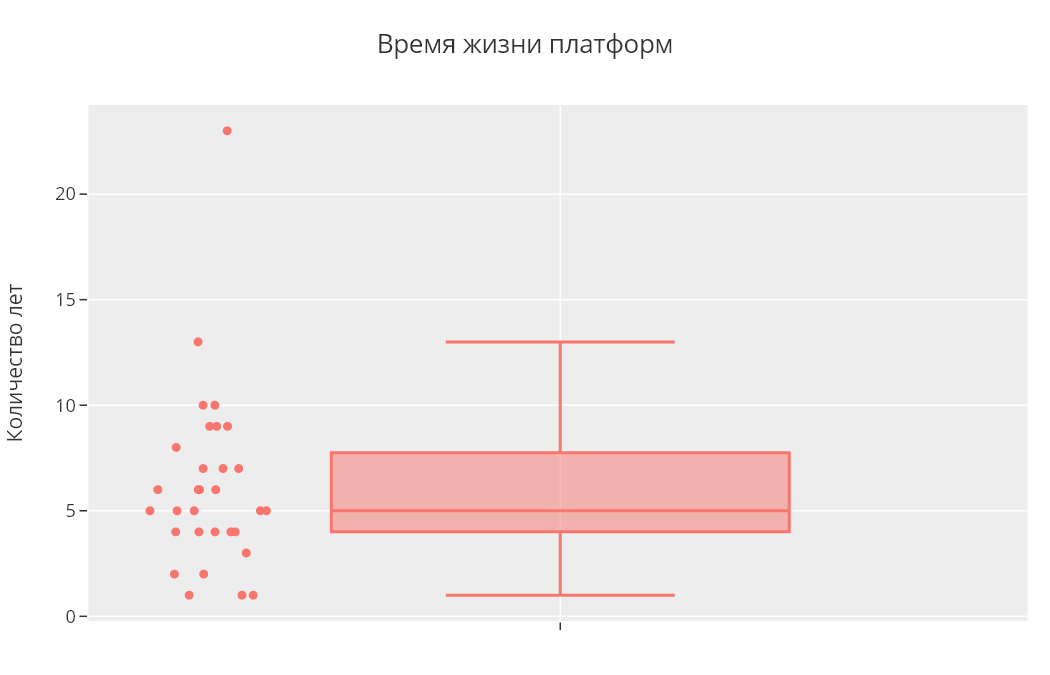

In [45]:
px.box(platform_year, y="year_of_life", labels={"year_of_life":"Количество лет"}, title="Время жизни платформ", points="all")

В целом, график подтверждает наши выводы, выбросов немного, сам *ящик* симметричен, с чуть смещенной медианой.

Далее, определим еще одну интересную характеристику, как часто появляются новые платформы:

In [46]:
((platform_year.sort_values(by="year_start")["year_start"]
    .dt.year.shift(-1) - platform_year.sort_values(by="year_start")["year_start"]
        .dt.year.shift(0))
        .dropna()
        .median())

1.0

Определили, что в среднем раз в год появляется новая игровая платформа.

___
Переходим к определение топовых игровых платформ, которые имеют самые высокие продажи в году.

Функция, которая определяем 3 платформы с наибольшими суммарными продажами:

In [47]:
def top3_platform(group):
    #  Уберем платформы вообще без продаж
    data = group.reset_index().query("all_sales > 0")
    
    # Подготовим структуру данных 
    out = pd.Series(np.nan, index=range(1,4))
    
    # В цикле мы перебираем 3 топовые платформы и записываем из название в out
    for (_, val), idx in zip(data.sort_values(by="all_sales", ascending=False).iterrows(), range(1,4)):
        out.loc[idx] = val["platform"]
        
    return out

Применим функцию к данным по продажам платформ за каждый год:

In [48]:
top_3_platform = platforms.groupby(level=1).apply(top3_platform)
display(top_3_platform)

,1,2,3
year_of_release,,,
1980,2600,NaN,NaN
1981,2600,NaN,NaN
1982,2600,NaN,NaN
1983,nes,2600,NaN
1984,nes,2600,NaN
1985,nes,2600,pc
1986,nes,2600,NaN
1987,nes,2600,NaN
1988,nes,gb,2600


Получили структуры данных, где указаны три самые продаваемые платформы за каждый год.

Переходим к расчету одно из самых важных для нас характеристик - *актуальное время платформы*.  
Ведь зачем нам учитывать в нашем планировании кампании на следующий год платформы, продажи с которых малы и они не актуальны? Нам нужны данные для актуальных платформ с высокими уровнями продаж!

Итак, логика действий будет следующая:
* по данных, которые получили выше (три топ платформы за каждый год), определим когда платформа попала в топ, а когда из него выбыла;
* по данным попадания в топ и выбывания из него определим, сколько в среднем платформа находится в топе по продажам, данное значение и будет *актуальным временем платформы*.

Следующая функция ищет когда платформа попала в топ, а когда выбыла из него:

In [49]:
# Рабочая структура данных 
top_year_platform = pd.DataFrame(columns=["year_top_start", "year_top_end", "years_in_top"])

def top_year_of_platform(platform):
    # Делаем выборку данных из Топа, когда наша платформа была с топе
    top_current_platform = top_3_platform[top_3_platform.eq(platform).any(axis=1)]
    
    # Если платформа вообще ни разу не была с топе, то 
    if not top_current_platform.empty:
        # Определяем год попадания в топ
        year_top_start = top_current_platform.index[0]
        # Год выбывания из топа 
        year_top_end = top_current_platform.index[-1]
        # Выдаем значения годов, и еще актуальное время платформы
        return year_top_start, year_top_end, year_top_end.year-year_top_start.year+1
    else:
        # сразу уходим
        return [np.nan]*3

# В цикле обходим все существующие в данных платформы
for platform in games["platform"].unique():
    top_year_platform.loc[platform] = top_year_of_platform(platform)

top_year_platform.dropna()

,year_top_start,year_top_end,years_in_top
wii,2006,2010,5
nes,1983,1993,11
gb,1988,1999,12
ds,2005,2008,4
x360,2007,2013,7
ps3,2009,2014,6
ps2,2000,2006,7
snes,1990,1995,6
gba,2001,2004,4
ps4,2014,2016,3


Итак, колонка *years_in_top* содержит интересующую нас информацию, о том, сколько лет платформа находилась в топе.  
Найдем медиану данных величин:

In [50]:
top_year_platform["years_in_top"].median()

5.0

Определили, что ***актуальное время***, которое подходит для планирования кампании на следующий год - это 5 предыдущих лет, всё, что было до этого уже вышло из топа по продажам, потеряло актуальность, и скорее всего, что вообще "умерло" (см. *время жизни платформы*). 

___
Интересен тот факт, что *время жизни платформы* и её *актуально время* достаточно близкие величины, поэтому можем предположить, что распределение продаж у платформы по годам имеет колокообразные вид, с достаточно крутыми фронтами подъема и спада продаж.  
Проверим это.

Построим распределения величин продаж по годам для 5 платформ с самыми высокими продажами за всё время.  

In [51]:
platforms.pivot_table(index="platform", aggfunc="sum").nlargest(5, columns="all_sales")

,all_sales
platform,
ps2,1 247.28
x360,961.3
ps3,931.33
wii,891.18
ds,802.79


Нашли платформы, которые имели самые высокие продажи, далее сделаем выборку данных для этих платформ, и немного усредним величины суммарных продаж скользящим средним.

In [52]:
dist_top_platform = platforms.loc[platforms.pivot_table(index="platform", aggfunc="sum").nlargest(5, columns="all_sales").index]
dist_top_platform = dist_top_platform.reset_index() 
dist_top_platform["year_of_release"] = dist_top_platform["year_of_release"].dt.year 
dist_top_platform["all_sales"] = dist_top_platform["all_sales"].rolling(4).mean().shift(-2)

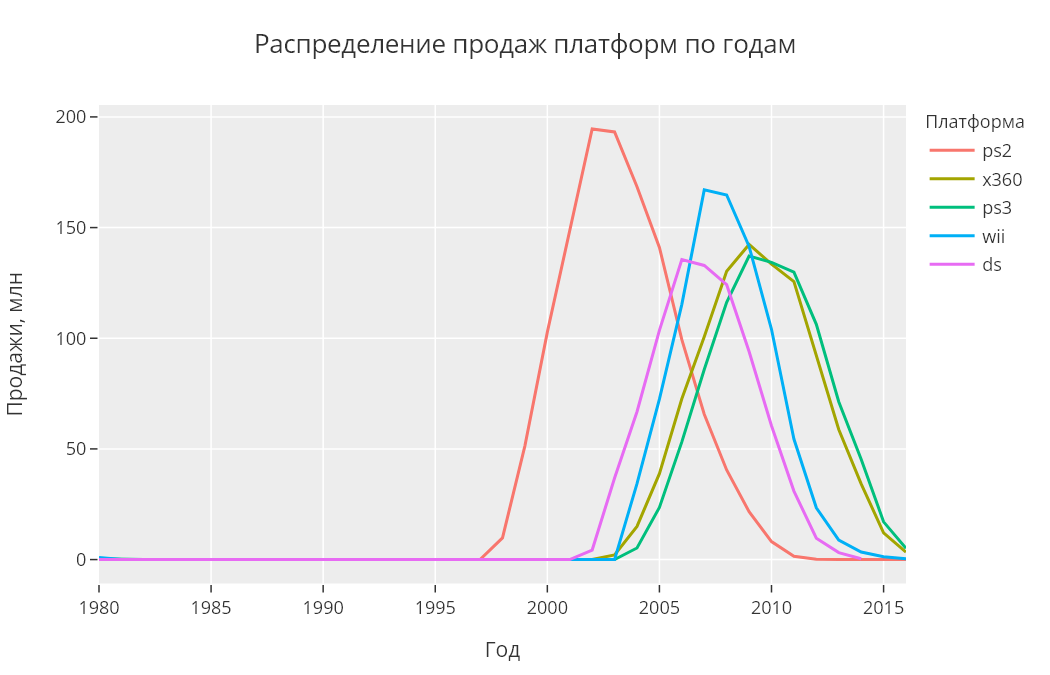

In [53]:
px.line(dist_top_platform, x="year_of_release", y="all_sales", color="platform",
        labels={"year_of_release":"Год","all_sales":"Продажи, млн","platform":"Платформа"},
        title="Распределение продаж платформ по годам")

Наше предположение, что распределение продаж по годам имеет колокобразную форму подтвердились.  
Данное распределение внешне напоминает нормально, также мы видим, что распределения похожи друг на друга, из чего можно сделать вывод, что каждая популярная платформа устаревает и теряет популярность примерно за одно и тоже время.

<a id="4_3.3"></a>
## 3.3. Формирование выборки за актуальный период

Сделаем выборку из всех имеющихся данные за последние *5 лет*:

In [54]:
relevant_games = games.query("year_of_release >= '2012'")
relevant_games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
13713,horses 3d,3ds,2012,misc,0.04,0,0,0,60.5983,6.3,e,0.04
11045,cardfight!! vanguard: ride to victory,3ds,2013,misc,0,0,0.09,0,nan,nan,NaN,0.09
14683,handball 16,ps3,2015,sports,0,0.02,0,0,nan,nan,e,0.02
14604,darius burst: chronicle saviours,psv,2016,action,0,0,0.03,0,nan,nan,NaN,0.03
4770,tales of zestiria,ps4,2015,role-playing,0.17,0.15,0.02,0.06,72,6.8,t,0.4
16015,mark mcmorris infinite air,xone,2016,sports,0.01,0,0,0,68.2933,7.1,t,0.01
4771,metal gear solid: the legacy collection,ps3,2013,adventure,0.31,0.01,0.03,0.06,93,9,m,0.41
2313,lego marvel super heroes,3ds,2013,action,0.42,0.36,0.04,0.07,61,5.2,e10+,0.89
12751,tropico 5,x360,2014,simulation,0.03,0.02,0,0,71,7.2,t,0.05
16260,htol#niq: the firefly diary,psv,2014,platform,0,0,0.01,0,58,7.7,t,0.01


В последующих анализаx будем использовать только эти данные.

<a id="4_3.4"></a>
##  3.4. Определение потенциально прибыльных платформ

Ответим на вопрос: `Какие платформы лидируют по продажам, растут или падают?`

Подготовим данные, сгруппируем по платформам и годам, а также нормируем данные о продажах, т.е. суммарные продажи со всех платформ за год - это 1, а продажи с каждой платформы составляет доли, от 1. Тем самым мы исключаем фактор того, что за каждый год величина продаж разная, мы смотрим только на то, с какой платформы продаж было больше.  
Также исключим из выборки платформы, данных для которых нет за 2016 год.

In [55]:
top_sales = relevant_games.pivot_table(values="all_sales", index=["platform", "year_of_release"], aggfunc=np.sum)
top_sales = top_sales.groupby(level=1).apply(lambda x: x/x.sum()).sort_values(by="all_sales")
top_sales = top_sales.reindex(top_sales.xs(pd.Period(2016), level=1).index, level=0)
display(top_sales.round(3))

all_sales
platform year_of_release           
wii      2016                 0.001
         2015                 0.004
         2014                 0.011
         2013                 0.024
         2012                 0.061
x360     2016                 0.012
         2015                 0.045
         2014                 0.105
         2013                 0.245
         2012                  0.28
ps3      2016                 0.028
         2015                 0.063
         2014                 0.144
         2012                 0.302
         2013                 0.313
psv      2015                 0.023
         2013                 0.029
         2016                 0.033
         2014                 0.036
         2012                 0.045
wiiu     2016                 0.035
         2012                 0.049
         2013                  0.06
         2015                 0.061
         2014                 0.066
pc       2015                 0.032
         2013                 0.035
         2014                  0.04
         2016                  0.04
         2012                 0.065
3ds      2015                 0.104
         2016                 0.117
         2014                 0.132
         2012                 0.144
         2013                 0.156
xone     2013                 0.052
         2014                 0.163
         2016                 0.201
         2015                 0.224
ps4      2013                 0.072
         2014                 0.302
         2015                 0.444
         2016                 0.533

Построим столбчатую диаграмму продаж, из всех вариантов диаграмм мне больше всего понравился этот, он не сильно перегружен, но есть вся необходимая информация:

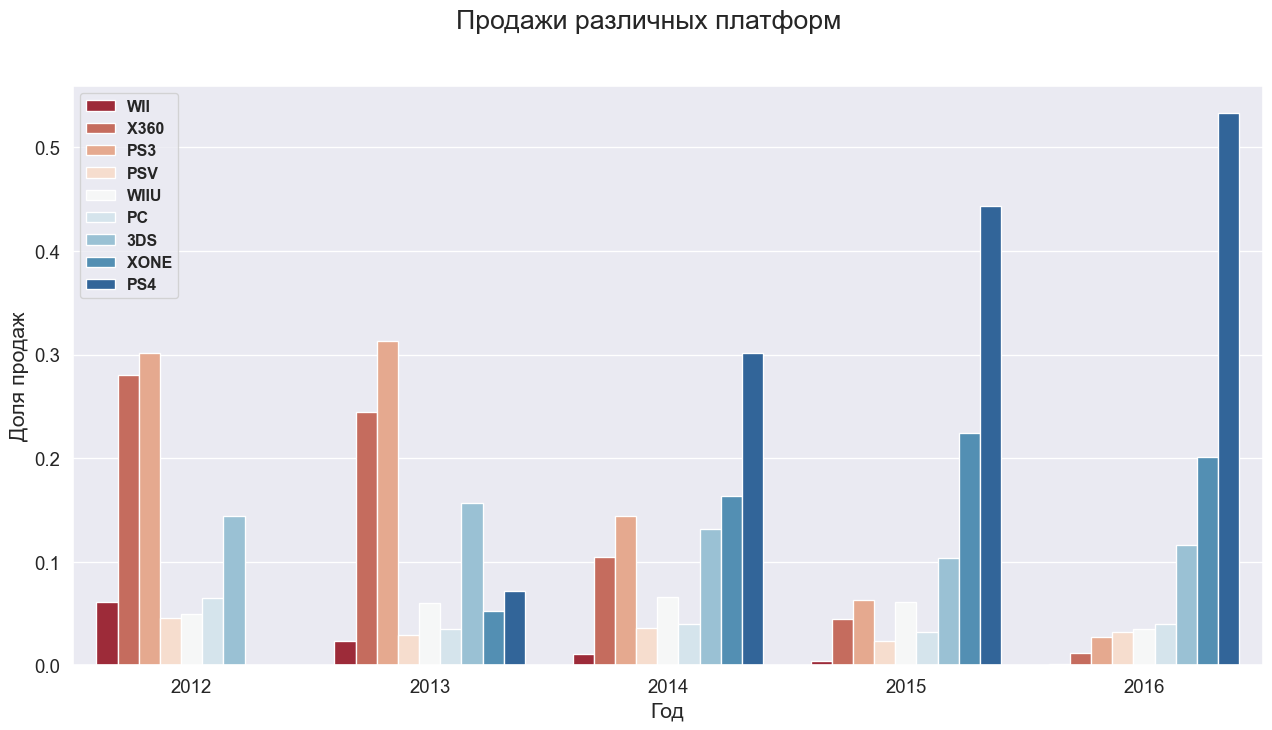

In [56]:
# Сбрасываем индекс, seaborn с индексами не работает, ей нужны данные из колонок
top_sales_plot = top_sales.reset_index()
# Преобразуем тип Period в простое числа, с временными типами seaborn у меня так и не заработал
top_sales_plot["year_of_release"] = top_sales_plot["year_of_release"].dt.year

# Создаем фигуру и оси
fig, ax = plt.subplots(1)

# Делаем свою палитру цветов
palette = sns.color_palette("RdBu", top_sales_plot["platform"].nunique())

# Построение диаграммы
sns.barplot(data=top_sales_plot, x="year_of_release", y="all_sales", hue="platform", palette=palette, ax=ax)

# Добавляем метки и подписи осей
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Год", fontsize=16)
ax.set_ylabel("Доля продаж", fontsize=16)
# Заголовок окна
plt.gcf().suptitle("Продажи различных платформ", fontsize=20)

# Редактируем легенду
legend = ax.get_legend()
legend.set_title("")
for text in legend.get_texts():
    text.set_text(text.get_text().upper())
    text.set_size(12)
    text.set_fontweight("bold")

Как потенциально прибыльные платформы можем принять:
* **PS4** - с каждым годом продажи растут;
* **PC** - продажи остаются на одном уровне, данная платформа захватила часть рынка и держит её;
* **XBOX ONE** - тоже набирающая популярность платформа, но чуть менее, чем PS4
* **3DS** - продажи с данной платформы снижаются, но еще остаются на достаточном уровне.

Построим график «ящик с усами» для каждой платформы:

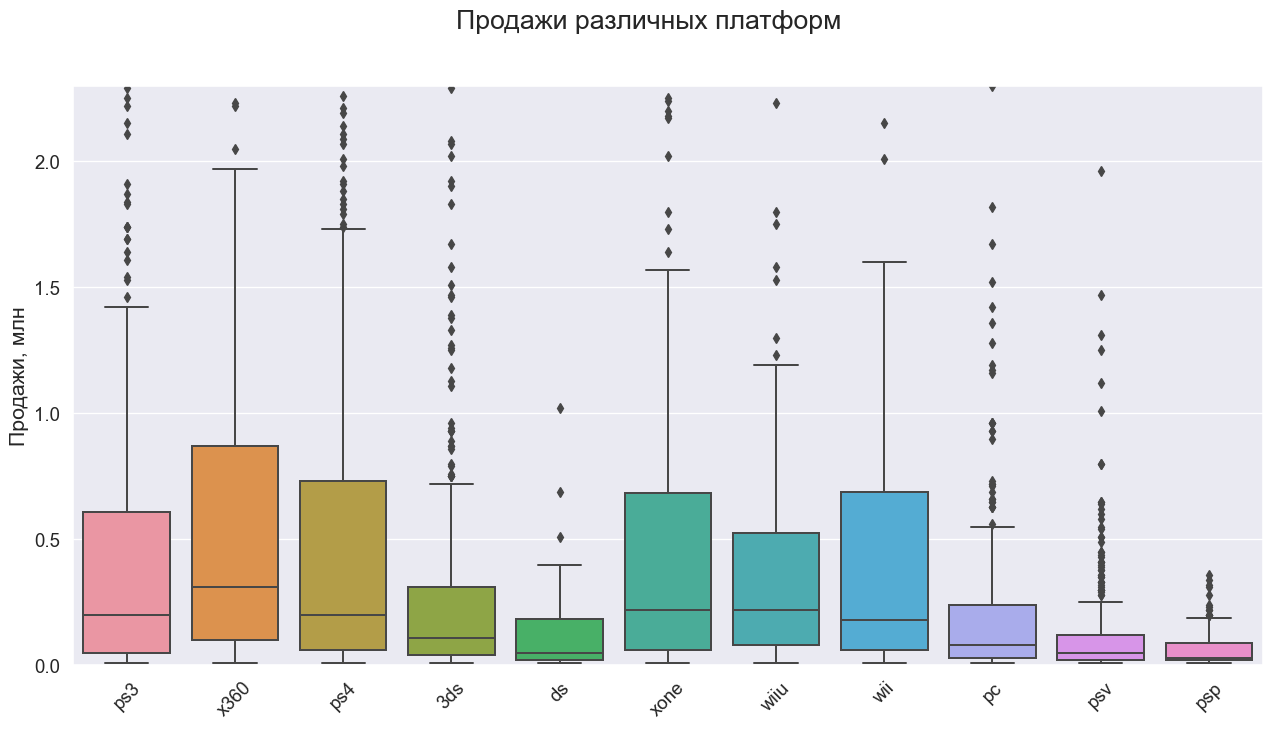

In [57]:
ax = sns.boxplot(data=relevant_games, x="platform", y="all_sales")

ax.tick_params(axis="x", labelrotation=45)
ax.set(ylim=(0,2.3))

# Добавляем метки и подписи осей
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("", fontsize=16)
ax.set_ylabel("Продажи, млн", fontsize=16)
# Заголовок окна
plt.gcf().suptitle("Продажи различных платформ", fontsize=20)
pass

Проанализируем график: 
* диаграммы размаха для различных платформ имеет разнообразный вид, что говорит о том, что есть платформы с достаточно низким уровнем продаж, которые "*не выстрельнули*" на рынке, например, ***PSP*** и ***PSV***; 
* некоторые платформу имеют похожий вид диаграммы, причем они также входят в топ по продажам.

Взглянем на средние значения продаж для каждой платформы:

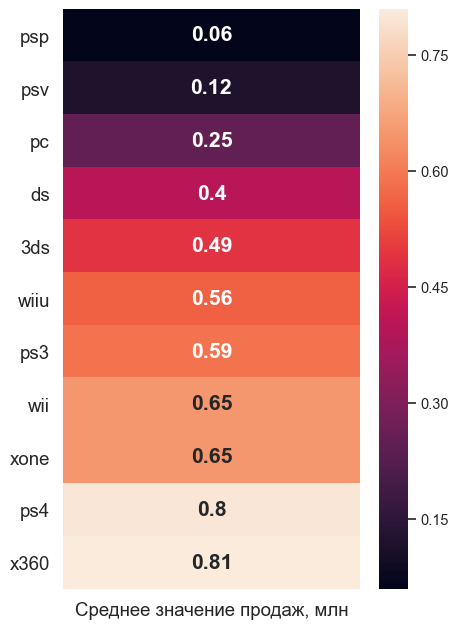

In [58]:
mean_sales = relevant_games.pivot_table(values="all_sales", index="platform", aggfunc="mean")
ax = sns.heatmap(mean_sales.round(2).sort_values(by="all_sales"), annot=True,
                annot_kws=dict(fontsize=16, fontweight="bold"))
plt.gcf().set_size_inches(5,8)

ax.tick_params(labelsize=14)
ax.tick_params(axis="y", labelrotation=0)
ax.set(xticklabels=["Среднее значение продаж, млн"], ylabel="")
pass

In [59]:
(mean_sales.std() / mean_sales.mean())["all_sales"].round(2)

0.52

Получили, что средние продажи сильно зависят от платформы, стандартное отклонение составляет половину от среднего значения, что довольно много.  
Вывод один - нужно тщательно выбирать платформу, которую будем продвигать, чтобы не потратить усилия на непопулярную и неприбыльную.

<a id="4_3.5"></a>
## 3.5. Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

В качестве популярной платформы выберем ***PS4***.

In [60]:
games_for_ps4 =  relevant_games.query("platform == 'ps4'")[["critic_score","user_score","all_sales"]]
display(games_for_ps4)

,critic_score,user_score,all_sales
31,nan,nan,14.63
42,97,8.3,12.62
77,82,4.3,8.58
87,nan,nan,7.98
92,83,5.7,7.66
...,...,...,...
16500,69,7.5,0.01
16503,nan,nan,0.01
16526,61,7.9,0.01
16530,51,5.5,0.01


Отбросим выбросы:

In [61]:
Q1, Q3 = games_for_ps4["all_sales"].quantile([0.25, 0.75])
IQR = Q3-Q1
games_for_ps4 = games_for_ps4.query("@Q1-1.5*@IQR <= all_sales <= @Q3+1.5*@IQR")

Посчитаем корреляцию:

In [62]:
labels = ["Оценки критиков", "Оценки пользователей", "Продажи"]
games_for_ps4.corr().round(2).set_axis(labels, axis=1, inplace=False).set_axis(labels, axis=0, inplace=False).head(5)

,Оценки критиков,Оценки пользователей,Продажи
Оценки критиков,1,0.65,0.27
Оценки пользователей,0.65,1,0.03
Продажи,0.27,0.03,1


Построим диаграммы рассеяния:

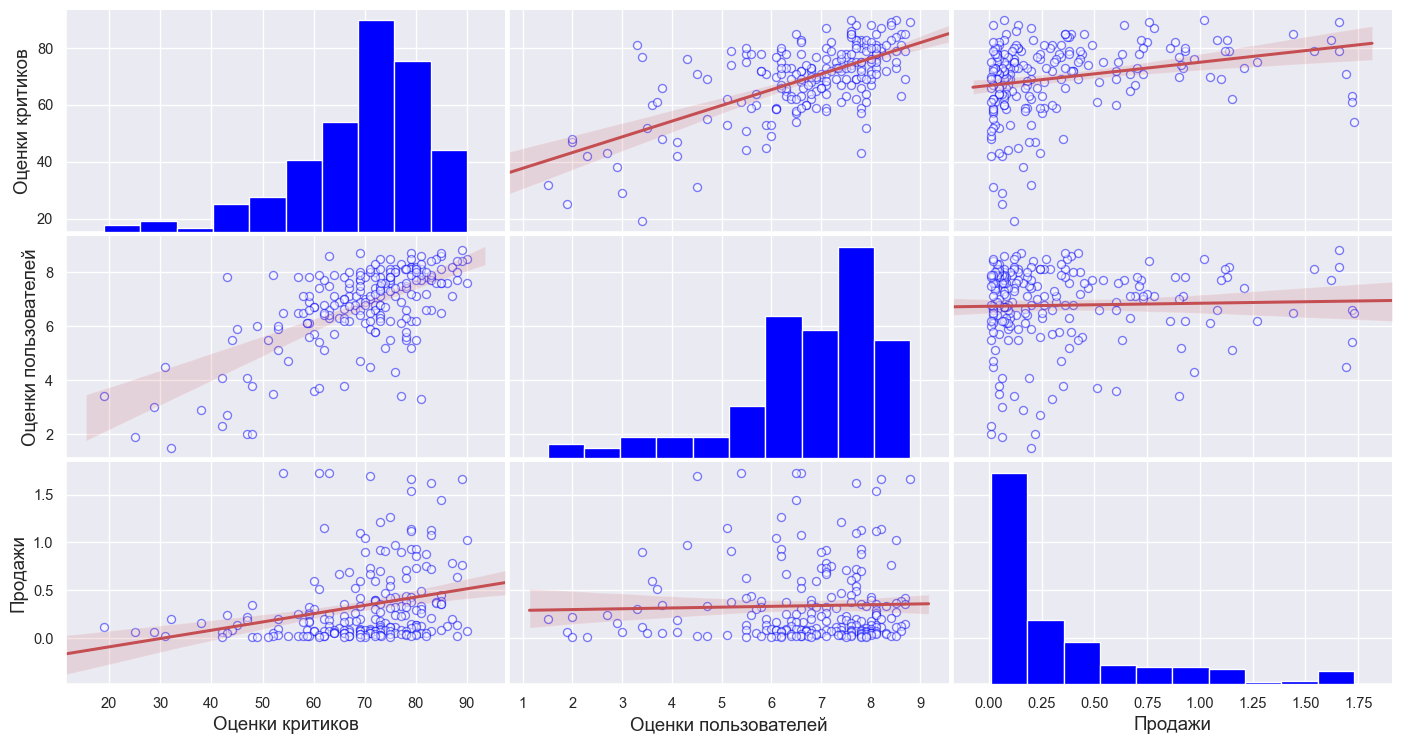

In [63]:
line_kws = {"color": "r"}
scatter_kws = {"alpha":0.5, "color": "w", "edgecolors":"blue"}
plot_kws = {"scatter_kws": scatter_kws, "line_kws":line_kws}

diag_kws = {"color": "blue"}

g = sns.pairplot(data=games_for_ps4.dropna(), kind="reg", plot_kws=plot_kws, diag_kws=diag_kws)
plt.gcf().set_size_inches(16,8)

font_size = 14
labels = ["Оценки критиков", "Оценки пользователей", "Продажи"]

for ax1, ax2, label in zip(g.axes.ravel(order="F"), g.axes[::-1].ravel(order="C"), labels):
    ax1.set_ylabel(label, fontsize=font_size)
    ax2.set_xlabel(label, fontsize=font_size)

g.fig.subplots_adjust(hspace=0.02, wspace=0.01)

Опираясь на значение коэффициентов корреляции и диаграммы рассеяние, не могу сказать, что продажи сильно зависят от оценок, т.к. низкие значения корреляции говорят о том, что *линейной* зависимости между данными параметрами нет, а из диаграммы рассеяния не прослеживаются какие-либо зависимость сложно формы,например, есть игры с низкими оценками, но высокими продажами.  
Однако, большинство оценок игр с высокими продажами лежат в верхней части оценочного диапазона.

<a id="4_3.6"></a>
## 3.6. Соотнесение выводов о продажах игр на другие платформы

,Оценки критиков,Оценки пользователей,Продажи
PC,,,
Оценки критиков,1,0.5,0.32
Оценки пользователей,0.5,1,-0.05
Продажи,0.32,-0.05,1


,Оценки критиков,Оценки пользователей,Продажи
XONE,,,
Оценки критиков,1,0.62,0.41
Оценки пользователей,0.62,1,0.07
Продажи,0.41,0.07,1


,Оценки критиков,Оценки пользователей,Продажи
3DS,,,
Оценки критиков,1,0.81,0.12
Оценки пользователей,0.81,1,0.03
Продажи,0.12,0.03,1


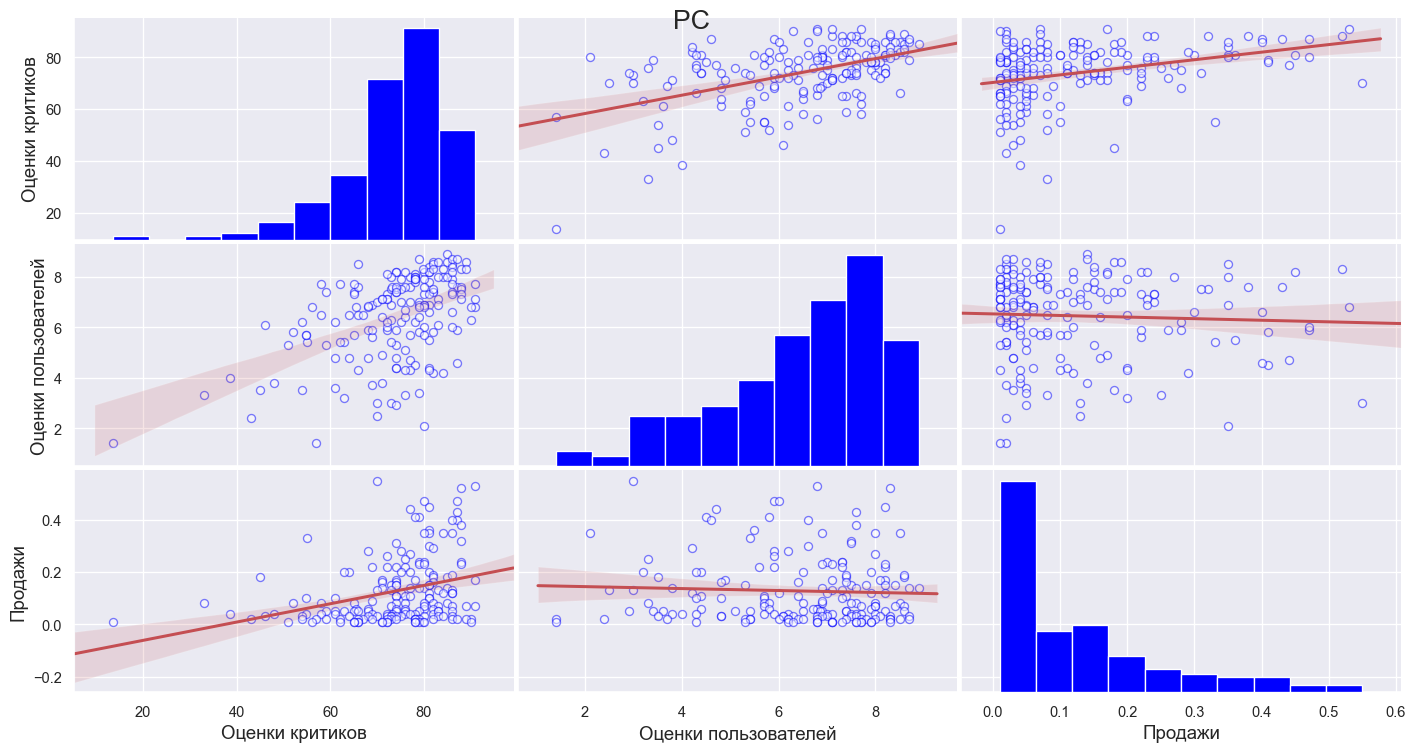

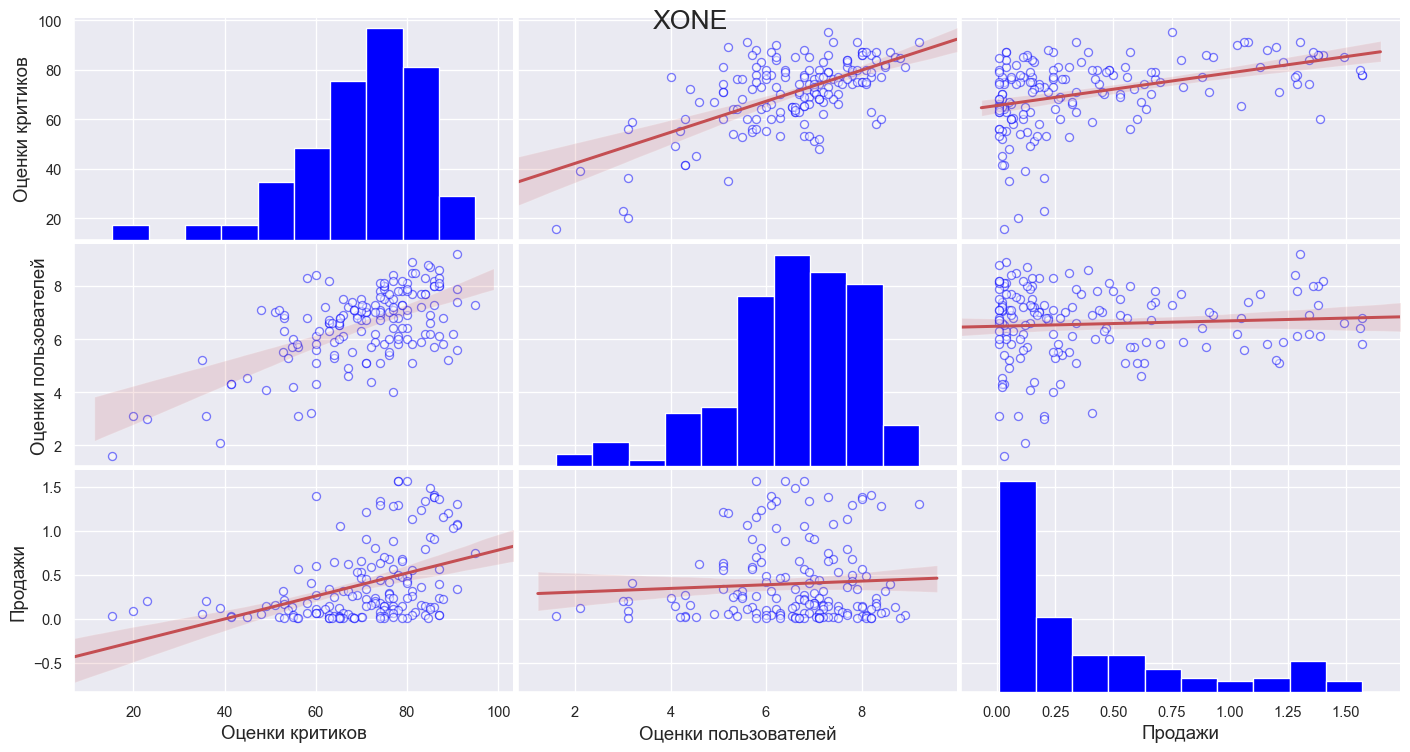

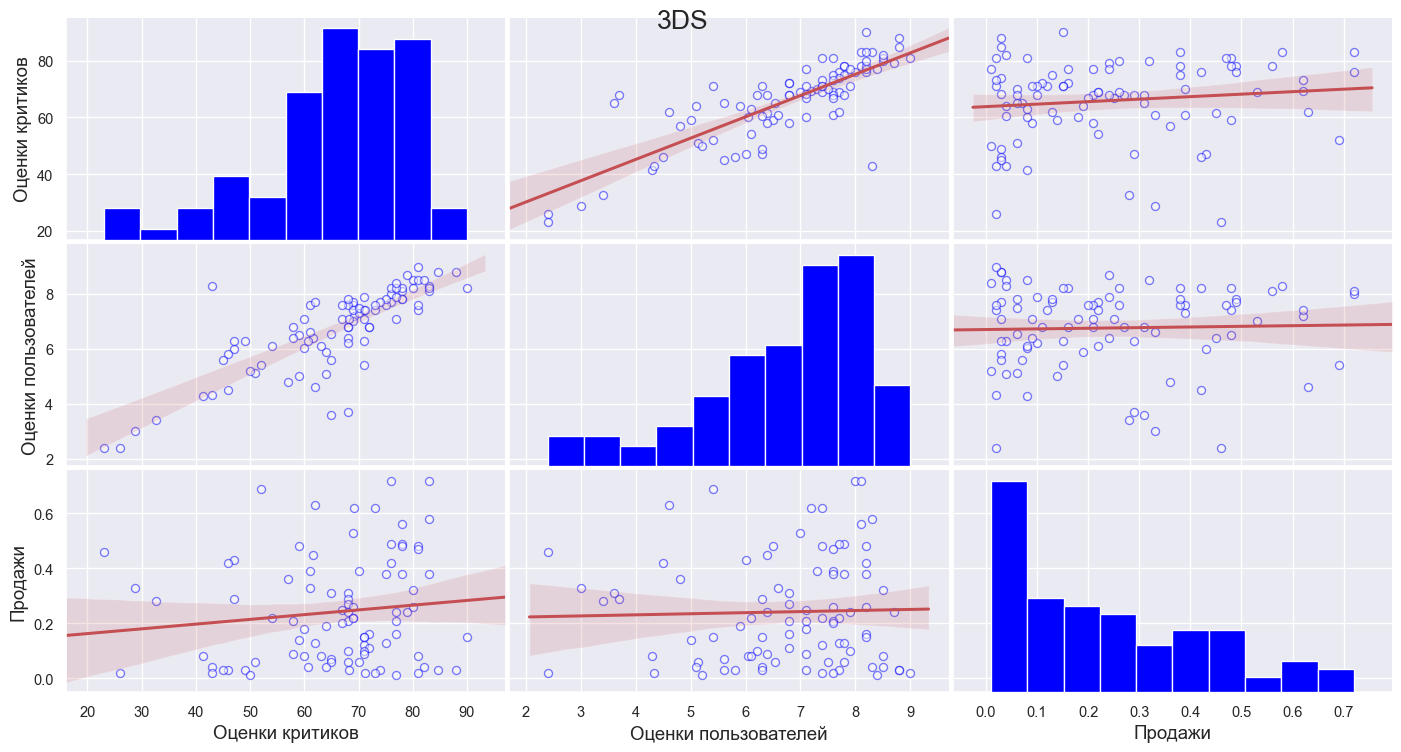

In [64]:
actual_platforms = ["pc", "xone", "3ds"]

for platform in actual_platforms:
    data = relevant_games.query("platform == @platform")[["critic_score","user_score","all_sales"]]
    Q1, Q3 = data["all_sales"].quantile([0.25, 0.75])
    IQR = Q3-Q1
    data = data.query("@Q1-1.5*@IQR <= all_sales <= @Q3+1.5*@IQR")
    
    labels = ["Оценки критиков", "Оценки пользователей", "Продажи"]
    display(data.corr().round(2).set_axis(labels, axis=1, inplace=False).set_axis(labels, axis=0, inplace=False).rename_axis(platform.upper(), axis=0, inplace=False))
    
    line_kws = {"color": "r"}
    scatter_kws = {"alpha":0.5, "color": "w", "edgecolors":"blue"}
    plot_kws = {"scatter_kws": scatter_kws, "line_kws":line_kws}

    diag_kws = {"color": "blue"}

    g = sns.pairplot(data=data.dropna(), kind="reg", plot_kws=plot_kws, diag_kws=diag_kws)
    plt.gcf().set_size_inches(16,8)

    font_size = 14
    labels = ["Оценки критиков", "Оценки пользователей", "Продажи"]

    for ax1, ax2, label in zip(g.axes.ravel(order="F"), g.axes[::-1].ravel(order="C"), labels):
        ax1.set_ylabel(label, fontsize=font_size)
        ax2.set_xlabel(label, fontsize=font_size)

    g.fig.subplots_adjust(hspace=0.02, wspace=0.01)
    g.fig.suptitle(platform.upper(), fontsize=20)
    

Результаты для данных платформ в целом совпадают с результатами для ***PS4***.  
А именно, *если игра получилась высокие оценки, это не значит, что она станет бестселлером, однако, если оценки очень низкие, на хорошие продажи надеяться не стоит*.

<a id="4_3.7"></a>
## 3.7. Анализ продаж игр по жанрам

Сгруппируем данные о продажай по жанрам, а также поделим суммарные продажи на количество игр, тем самым определим, сколько млн. получается с одной игры в среднем.

In [65]:
genre_popul = relevant_games.pivot_table(values="all_sales", index=["genre"], aggfunc=[np.sum, "count"])
genre_popul = genre_popul.droplevel(axis=1, level=1).set_axis(["all_sales", "quantity"], axis=1, inplace=False)
genre_popul["price"] = genre_popul.iloc[:, 0] / genre_popul.iloc[:, 1]
display(genre_popul)

,all_sales,quantity,price
genre,,,
action,441.47,1032,0.427781
adventure,29.43,302,0.0974503
fighting,44.49,109,0.408165
misc,85.04,192,0.442917
platform,61,85,0.717647
puzzle,4.89,28,0.174643
racing,53.5,115,0.465217
role-playing,192.8,370,0.521081
shooter,304.73,235,1.29672


Строим график распределения продаж по жанрам:

Text(0.5, 1.0, 'Распределение продаж игр по жанрам')

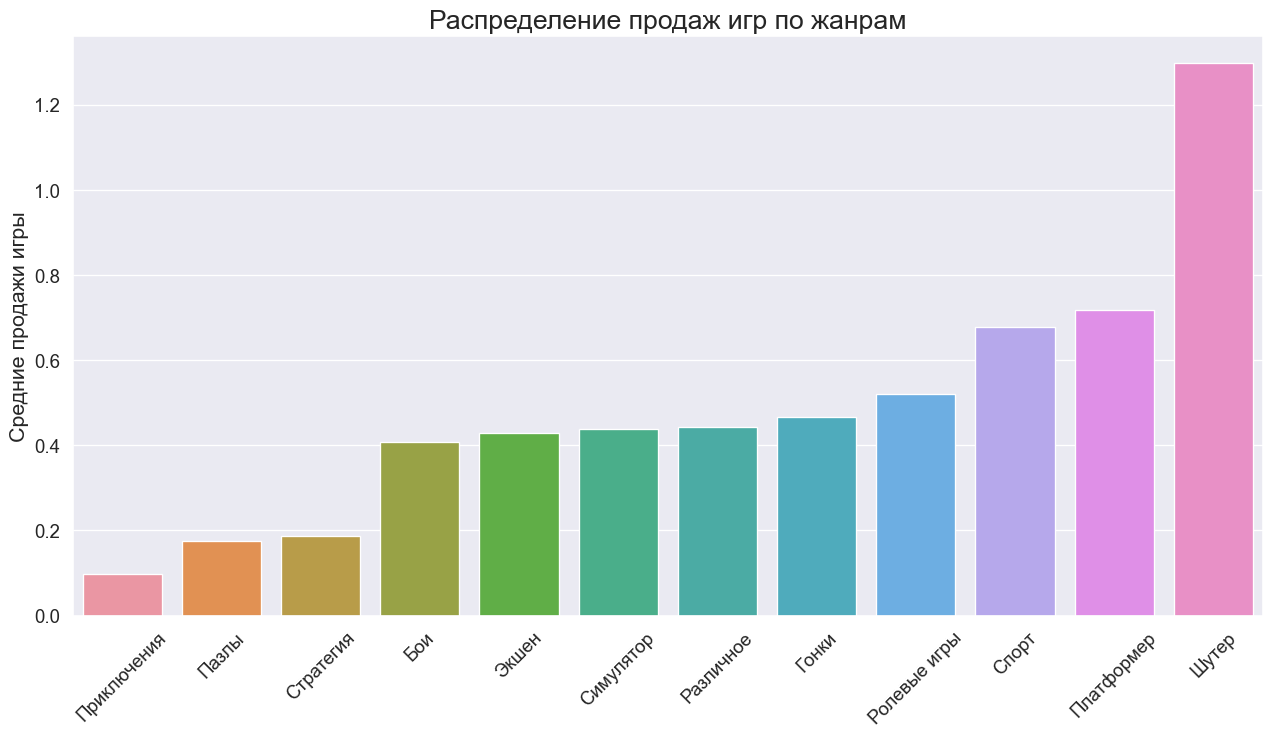

In [66]:
russuan_genre = {"action":"Экшен",
                "adventure":"Приключения",
                "fighting":"Бои",
                "misc":"Различное",
                "platform":"Платформер",
                "puzzle":"Пазлы",
                "racing":"Гонки",
                "role-playing":"Ролевые игры",
                "shooter":"Шутер",
                "simulation":"Симулятор",
                "sports":"Спорт",
                "strategy":"Стратегия"}

plot_data = genre_popul.rename(russuan_genre, axis=0).reset_index().sort_values(by="price")

ax = sns.barplot(data=plot_data, x="genre", y="price")
ax.tick_params(axis="x", labelrotation=45)
ax.tick_params(axis="both", labelsize=14)

ax.set_xlabel("")
ax.set_ylabel("Средние продажи игры", fontsize=16)
ax.set_title("Распределение продаж игр по жанрам", fontsize=20)

График говорит нам следующее:
* можно выделить жанры с высокими и низкими продажами, например *Шутер* и *Приключения*;
* однако, для большинства жанров показатель примерно одинаковы.

Отсюда можно сделать следующий вывод: в целом, продажи игры не сильно зависят от жанра, кроме особых, *шутер* или *приключения*.  
Популярность шутеров могу объяснить их динамической природой, также немалую вклад дает и развитие киберспорта.

<a id="4_4."></a>
# 4. Составление портрета пользователя каждого региона

Для составления портрета пользователя определим следующие величины:
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)<br>

А также, определим: 
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a id="4_4.1"></a>
## 4.1. Самые популярные платформы (топ-5)

Для определения самых популярных платформ, сгруппируем данные по платформам, а продажи по регионам:

In [67]:
regions = relevant_games.pivot_table(values=["na_sales", "eu_sales", "jp_sales"], index="platform", aggfunc="sum")
display(regions)

,eu_sales,jp_sales,na_sales
platform,,,
3ds,42.64,87.79,55.31
ds,3.53,3.72,4.59
pc,38.01,0,19.18
ps3,106.85,35.29,103.38
ps4,141.09,15.96,108.74
psp,0.42,10.47,0.13
psv,11.36,21.04,10.98
wii,11.92,3.39,17.45
wiiu,25.13,13.01,38.1


Построим круговые диаграммы для каждого региона:

Index(['ps4', 'ps3', 'x360', 'xone', '3ds'], dtype='object', name='platform')
Index(['3ds', 'ps3', 'psv', 'ps4', 'wiiu'], dtype='object', name='platform')
Index(['x360', 'ps4', 'ps3', 'xone', '3ds'], dtype='object', name='platform')


Text(0.5, 0.98, 'Топ5 платформ в каждом регионе')

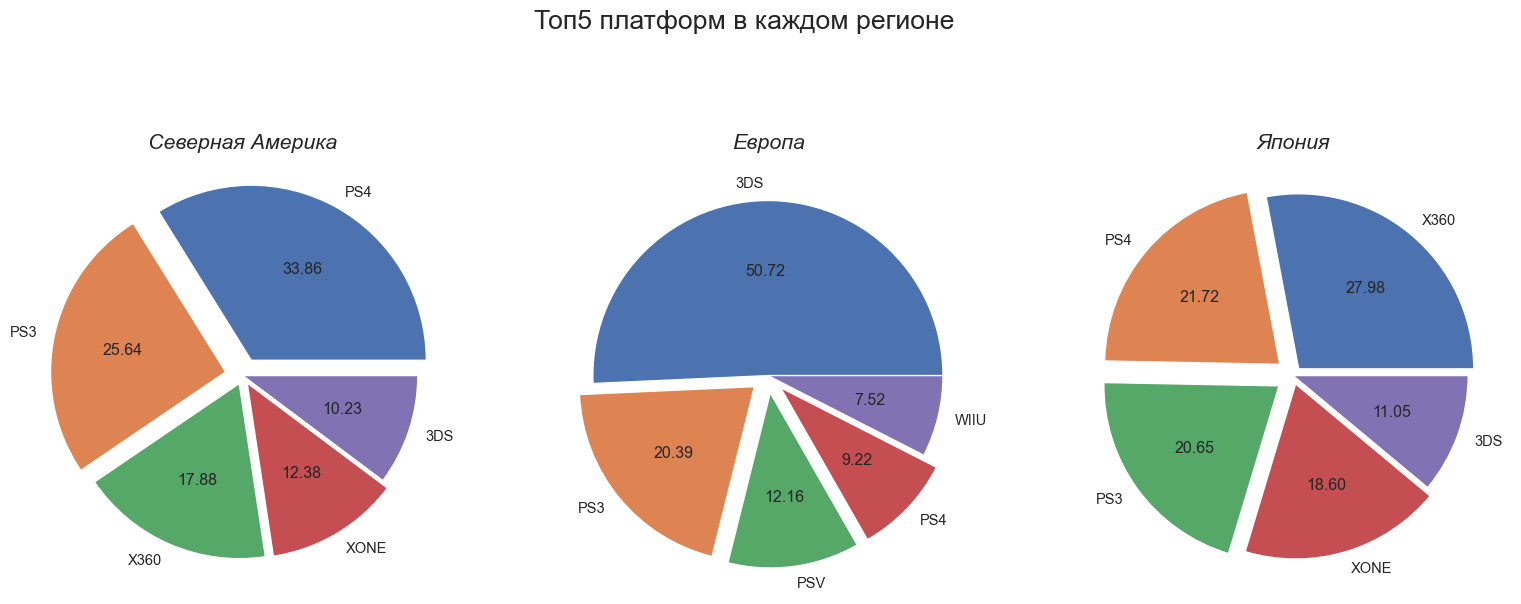

In [68]:
fig, axes = plt.subplots(1,3, figsize=(20,8))
titles = ["Северная Америка", "Европа", "Япония"]

# Величины выдвижения
Microsoft = 0.05
Sony = 0.1
Nintendo = 0

# Сгенирируем величины выдвижения секторов в зависимости от компании
def gen_explode(indexs):
    explode = []
    for ind, platform in enumerate(indexs):
        if platform in ["ps4", "ps3", "psv"]:
            explode.append(Sony)
        elif platform in ["x360", "xone"]:
            explode.append(Microsoft)
        else:
            explode.append(Nintendo)
            
    return explode

# В цикле перебираем регионы
for name_col, ax, title in zip(regions, axes, titles):
    # Выборка топ5 платформ в данном регионе
    top = regions.nlargest(5, columns=name_col)[name_col]
    print(top.index)
    explode = gen_explode(top.index)
    ax.pie(top, labels=top.index.str.upper(), autopct="%.2f", explode=explode)
    
    ax.set_title(title, fontsize=16, fontstyle="italic")
    ax.tick_params(axis="x",  labelsize = 14, labelrotation=0)

fig.suptitle("Топ5 платформ в каждом регионе", fontsize=20)


Результаты немного неожиданные, к моему удивлению в Северной Америке лидирует японская платформа, а в Японии наоборот, с небольшим перевесом выигрывает американская платформа. А в Европе платформы компании Microsoft вообще не попали в топ.

<a id="4_4.2"></a>
## 4.2. Самые популярные жанры (топ-5) 

Сруппируем данные по жанрам, как сделали это раньше для платформ

In [69]:
genre = relevant_games.pivot_table(values=["na_sales", "eu_sales", "jp_sales"], index="genre", aggfunc="sum")
genre = genre.rename(russuan_genre, axis=0)
display(genre)

,eu_sales,jp_sales,na_sales
genre,,,
Экшен,159.59,52.8,177.9
Приключения,9.46,8.24,8.92
Бои,10.79,9.44,19.79
Различное,26.32,12.86,38.19
Платформер,21.41,8.63,25.38
Пазлы,1.4,2.14,1.13
Гонки,27.29,2.5,17.22
Ролевые игры,48.53,65.44,64
Шутер,113.47,9.23,144.77


Построим столбчатую диаграмму для каждого региона, она позволит сравнить, сколько продаж имеют различные жанры:

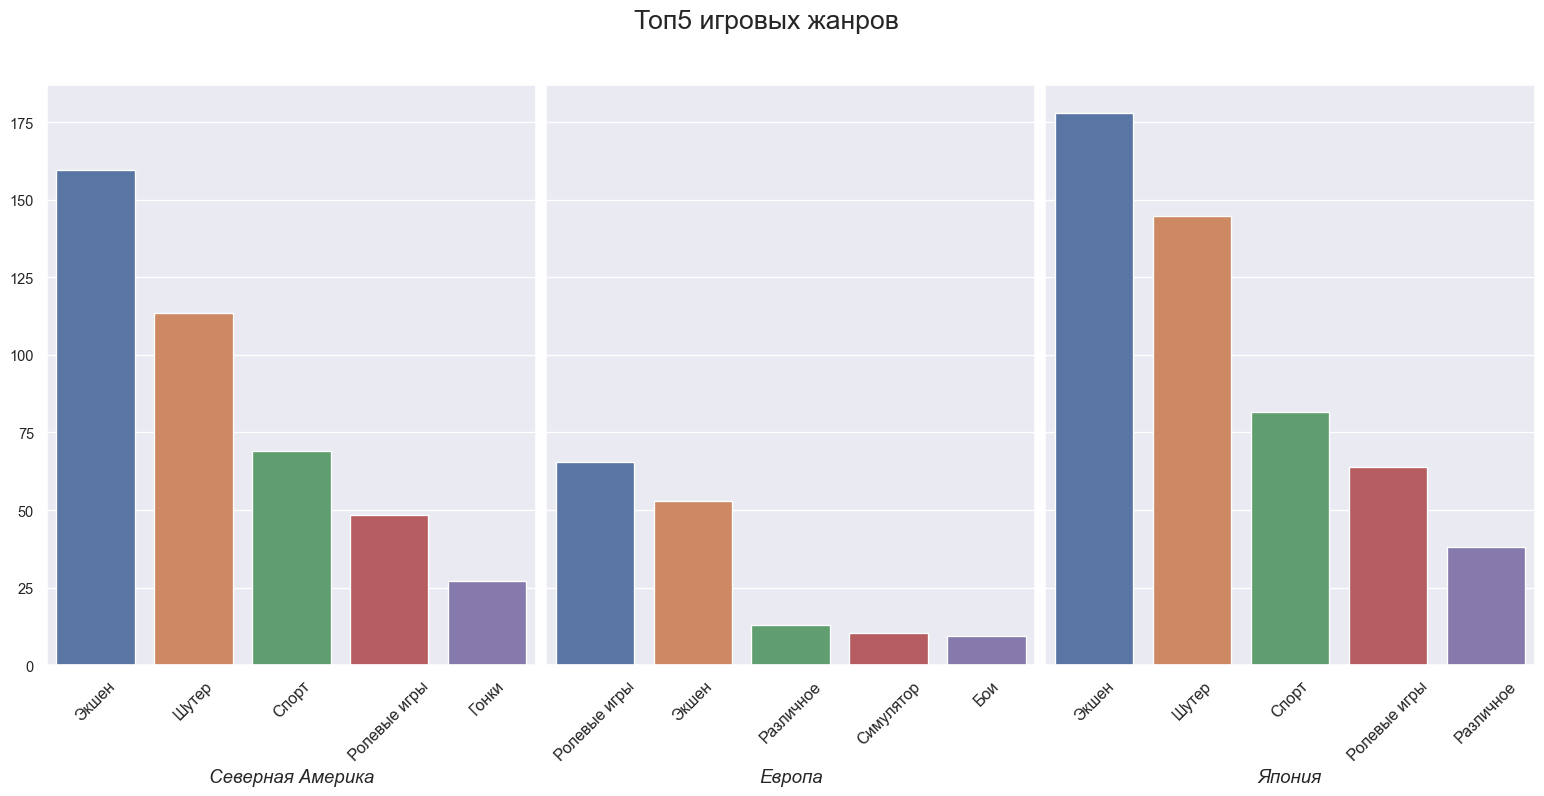

In [70]:
fig, axes = plt.subplots(1,3, figsize=(20,8), sharey="row", gridspec_kw=dict(wspace=0.02))
titles = ["Северная Америка", "Европа", "Япония"]

for name_col, ax, title in zip(genre, axes, titles):
    
    sns.barplot(ax=ax, data=genre.nlargest(5, columns=name_col).reset_index(),x="genre", y=name_col)
    ax.set_xlabel(title, fontsize=14, fontstyle="italic")
    ax.set_ylabel("")
    ax.tick_params(axis="x",  labelsize = 12, labelrotation=45)

fig.suptitle("Топ5 игровых жанров", fontsize=20)
pass

Получили, что немного другие результаты, чем в пункте [*Общее распределение игр по жанрам*](#general_dist_genre), это связано с тем, что там мы рассматривами средние продажи одно игры по жанрам, а здесь оцениваем суммарные продажи жанра по регионам, и получили, что с одна игра жанра *Шутер* приносит больше денег, однако количество продаваемых игры в жанре *Экшен* больше, и суммарные продажи у это жанра выше. 
Также заметно, что продажи в Европе ниже, чем в Северной Америке и Японии.

<a id="4_4.3"></a>
## 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе

Создадим выборку данных:

In [71]:
ESRB  = relevant_games.pivot_table(values=["na_sales", "eu_sales", "jp_sales"], index="rating", aggfunc="sum")
display(ESRB)

,eu_sales,jp_sales,na_sales
rating,,,
e,113.02,28.33,114.37
e10+,55.37,8.19,75.7
m,194.21,21.2,231.63
t,52.96,26.02,66.02


Нормируем продажи в каждом регионе, и домнажаем на 100, чтобы получить проценты. Теперь значение в колонке продаж показывает какой вклад в суммарные продажи дают игры в данным возрастным рейтингом. 

In [72]:
ESRB_Norm = ((ESRB / ESRB.sum()).round(4) * 100)
display(ESRB_Norm)

,eu_sales,jp_sales,na_sales
rating,,,
e,27.2,33.83,23.45
e10+,13.32,9.78,15.52
m,46.73,25.32,47.49
t,12.74,31.07,13.54


Построим столчатую диаграмму:

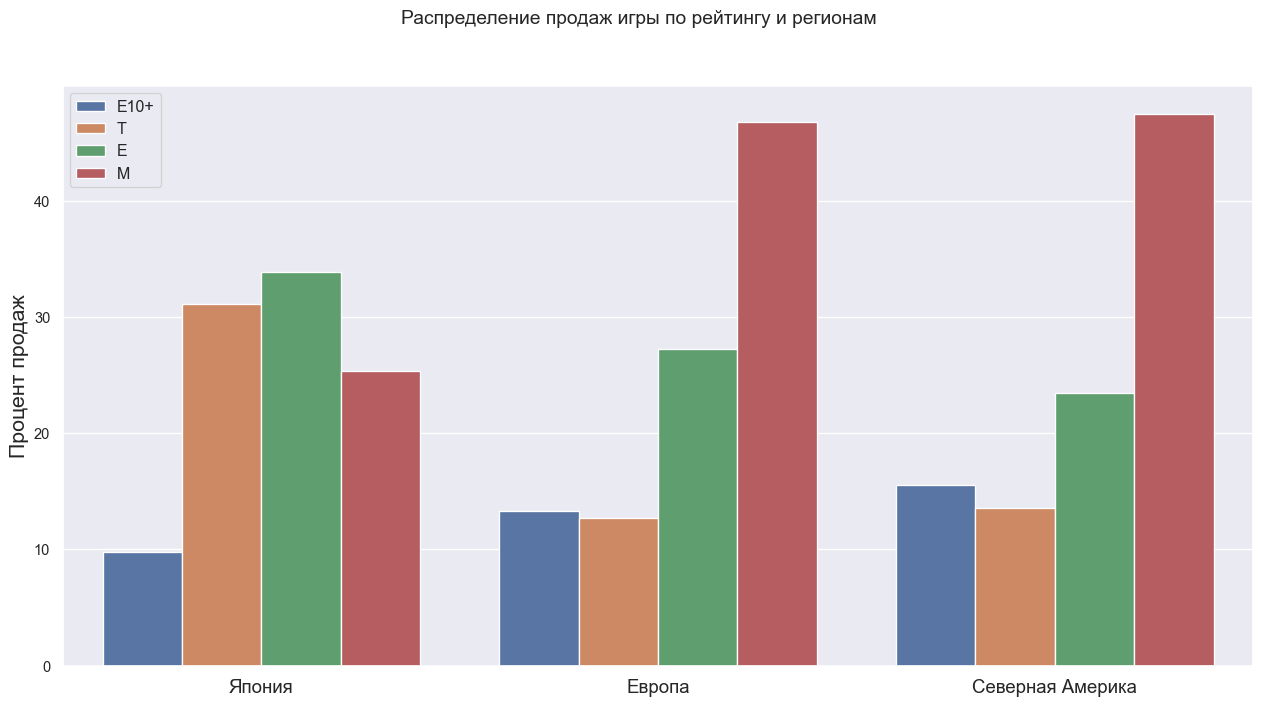

In [73]:
unstack_ESRB = ESRB_Norm.reset_index().melt(id_vars="rating")

ax = sns.barplot(data=unstack_ESRB.sort_values(by="value"), x="variable", y="value", hue="rating")
ax.set_xlabel("", fontsize=16)
ax.set_ylabel("Процент продаж", fontsize=16)

ax.set_xticklabels(["Япония","Европа","Северная Америка"], fontsize=14)

plt.gcf().suptitle("Распределение продаж игры по рейтингу и регионам")
legend = ax.get_legend()
legend.set_title("")
for text in legend.get_texts():
    text.set_text(text.get_text().upper())
    text.set_size(12)

In [74]:
ESRB_Norm.std(axis=1)

rating
e      5.25617
e10+   2.89595
m      12.5862
t      10.3596
dtype: float64

Получили, что рейтинг с самым большим ограничением *M* (17+) имеет самые высокие продажи почти во всех регионах. 
Также продажи, сгруппированные по рейтингу, не сильно меняются от одного региона к другому, величина стандартное отклонения при расчете по регионам имеет значение *5-10* процентов.  
Вывод следующию: игры с определенным рейтингом имеют более высокие показатели продаж, одно отсюда не видно, что продажи обусловлены именно рейтингом, а не другим каким-либо признаком, здесь рейтинг можно рассматривать как косвенную оценку контента игры, и чем выше возрастной рейтинг, тем насыщеннее и правдоподобнее игра, особенно из жанров Экшен или Шутер.   
Чуть особняком стоит Япония, там игры с высоким возрастным рейтингом имеют более низкие продажи, чем игры вообще без ограничений по возрасту.

<a id="4_5."></a>
# 5. Проверка гипотез

<a id="4_5.1"></a>
## 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*  <h3>Нулевая гипотеза $H_0$</h3>

Нулевая гипотеза формулируется используя знак равенство, поэтому для проверки поставленной гипотезы сформулируем $H_0$ следующим образом:  
___


$H_0$ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
___

* <h3>Альтернативная гипотеза $H_1$</h3>

___
$H_1$ - Средние пользовательские рейтинги платформ Xbox One и PC ***различаются***.
___

Поскольку нам неизвестна информация о генеральной совокупности (значение оценок пользователей для всех возможных игры за всё время для данным платформ), то анализ будем производить по *выборке* данных за актуальный период.
Для проверки гипотез по выборке воспользуемся ***t-тестом***:

Подготовим данные:

In [75]:
platform_for_analis = ["xone", "pc"]

compare_xone_and_pc = relevant_games.query("platform in @platform_for_analis").reset_index().pivot_table(values="user_score", index=["platform", "index"])
display(compare_xone_and_pc)

user_score
platform index            
pc       192             4
         458           3.9
         688           7.9
         959           4.8
         1095          7.9
...                    ...
xone     16544         6.8
         16597           6
         16630         8.2
         16643         6.6
         16660         6.7

[394 rows x 1 columns]

In [76]:
# Задаем пороговое значение
alpha = 0.05
# Проводим t-тест для средних из двух независимых выборок
results = st.ttest_ind(compare_xone_and_pc.xs("xone")["user_score"], compare_xone_and_pc.xs("pc")["user_score"], equal_var=False)

if alpha > results.pvalue:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть гипотезу")
print(f"p-value: {results.pvalue:.3f}")

Не можем отвергнуть гипотезу
p-value: 0.633


По результатам теста мы не можем отвергнуть нулевую гипотезу. Отсюда, мы не подтверждаем и не отвергаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не достаточно информации для этого.

Построим дополнительно диаграммы размаха:

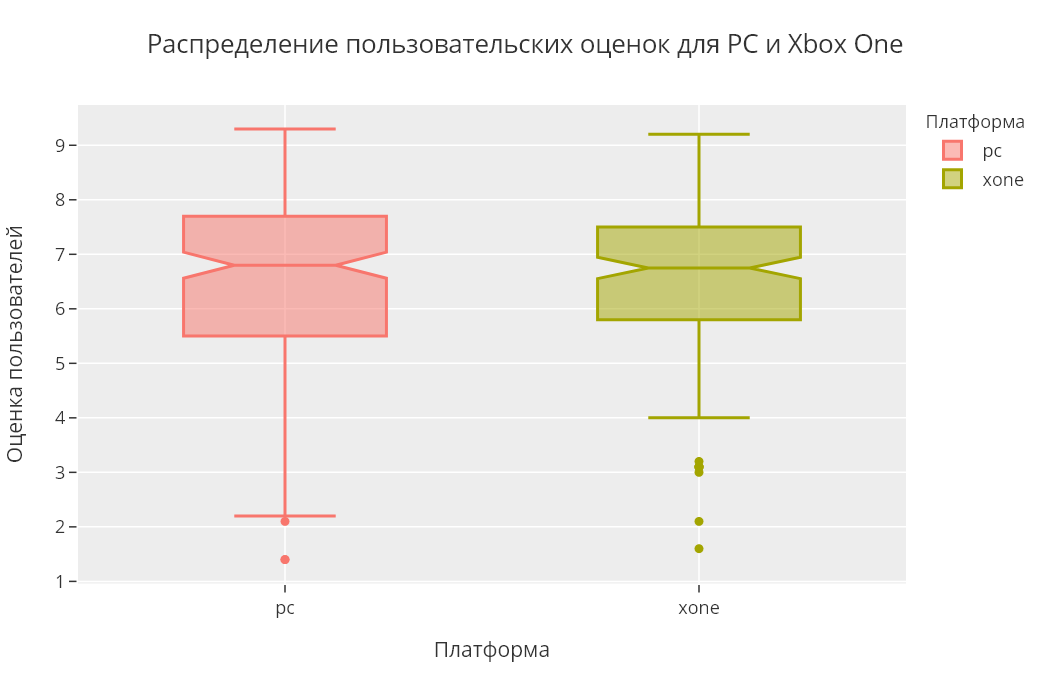

In [77]:
px.box(compare_xone_and_pc.reset_index(), x="platform", y="user_score", color="platform", notched=True,
       labels={"platform":"Платформа","user_score":"Оценка пользователей"},
      title="Распределение пользовательскиx оценок для PC и Xbox One")

Как видно из графика, доверительные интервалы обеих выборок пересекаются, что дополнительно подтверждает, что нельзя отвергать нулевую гипотезу.

<a id="4_5.2"></a>
## 5.2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

* <h3>Нулевая гипотеза $H_0$</h3>

___

$H_0$ - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») ***одинаковые***.

___

* <h3> Альтернативная гипотеза $H_1$</h3>

___
$H_1$ -Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») ***разные***.
___

Подготовим данные.

In [78]:
platform_for_analis = ["sports", "action"]

genre_compare= relevant_games.query("genre in @platform_for_analis").reset_index().pivot_table(values="user_score", index=["genre", "index"])
display(genre_compare)

user_score
genre  index            
action 16            8.2
       23            8.1
       42            8.3
       81            6.6
       127           6.9
...                  ...
sports 16142         8.8
       16146         6.9
       16450         4.5
       16518         1.4
       16643         6.6

[724 rows x 1 columns]

In [79]:
# Задаем пороговое значение
alpha = 0.05
# Проводим t-тест для средних из двух независимых выборок
results = st.ttest_ind(genre_compare.xs("action")["user_score"], genre_compare.xs("sports")["user_score"], equal_var=False)

if alpha > results.pvalue:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть гипотезу")
print(f"p-value: {results.pvalue:.3f}")

Отвергаем нулевую гипотезу
p-value: 0.000


Отвергаем нулевую гипотезу, отсюда следует, что различия средних значений пользовательских рейтингов жанров Action и Sports являются статистически значимыми.

## Вывод

В данном шаге получили, что:
1. у нас нет статистических значимых оснований считать различными средние значения пользовательских рейтингов игры для платформ *PC* и *Xbox One*;
2. мы, на основе имеющихся актуальных данных, можем предположить, что пользователи по-разному оценивают игры в жанре Action и в жанре Sports.

<a id="4_6."></a>
# 6. Общий вывод

Перед нами стояла следующая задача: ***Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании***.

В ходе выполнения работы мы выяснили:
* успешность игры зависит от платформы, потенциально прибыльные платформы на 2017 год: **PS4**, **PC**, **XBOX ONE** и **3DS**, и средние значение продаж сильно зависит от платформы;
* прямой зависимости между оценками критиков и пользователей и продажами нет, игра с высокими оценками может провалиться на рынке, а со средними выйти в топ. Однако, не нужно рисковать и вкладываться в игры с *низкими* оценками;
* продажи зависят от жанра игры. Если нам важны продажи с одной игры, то выбирать лучше жанр имеющих высокие продажи с одной игры, например, *Шутер*. Если же нам необходимо увеличить суммарные продажи нескольких игр, то можно рассмотреть *Экшен* или *Ролевые*, это зависит от региона;
* Регионы влияют! Как на продажи с платформ, так и на продажи определенных жанров;
* Пользователи не смогли решить своими оценками вечный спор между *PC* и игровой приставкой (*Xbox One*);
* В Японии лучше не делать больших надежд на игры с высоким ограничением по возрасту.
  
Еще очень важный момент - это наличие актуальных данных, данные за *1985* никак не помогут продать игры в *2017*.